<a href="https://colab.research.google.com/github/Durdonaxon95/Machine-Learning/blob/main/Unsupervised_Learning_Vazifa_1_Qilichova_D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Unsupervised Learning**

Vazifa-1

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [41]:
df = pd.read_csv('Bank Customer Churn Prediction.csv')
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [42]:
df.isnull().sum()

,0
customer_id,0
credit_score,0
country,0
gender,0
age,0
tenure,0
balance,0
products_number,0
credit_card,0
active_member,0


In [43]:
df.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

In [45]:
le_gender = LabelEncoder()
df['gender'] = le_gender.fit_transform(df['gender'])

df = pd.get_dummies(df, columns=['country'], drop_first=True)

features = ['credit_score', 'age', 'tenure', 'balance',
            'products_number', 'credit_card', 'active_member', 'estimated_salary']

scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])
df.head()


,customer_id,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_Germany,country_Spain
0,15634602,-0.326221,0,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,1,False,False
1,15647311,-0.440036,0,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,0,False,True
2,15619304,-1.536794,0,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,1,False,False
3,15701354,0.501521,0,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,0,False,False
4,15737888,2.063884,0,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,0,False,True


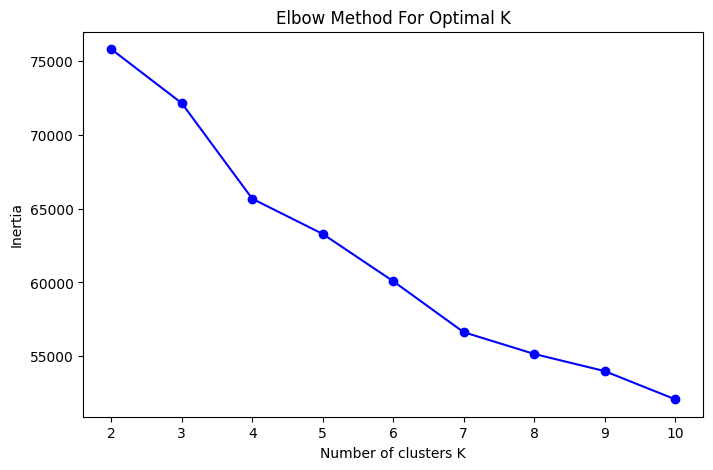

K=2, Silhouette Score=0.126
K=3, Silhouette Score=0.094
K=4, Silhouette Score=0.118
K=5, Silhouette Score=0.100
K=6, Silhouette Score=0.109
K=7, Silhouette Score=0.111
K=8, Silhouette Score=0.106
K=9, Silhouette Score=0.103
K=10, Silhouette Score=0.109


In [46]:
X = df.drop(columns=['customer_id', 'churn'])
inertia = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of clusters K')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal K')
plt.show()

# Silhouette Score hisoblash
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    score = silhouette_score(X, cluster_labels)
    print(f"K={k}, Silhouette Score={score:.3f}")


In [47]:
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

# 5. Har bir klasterning xususiyatlarini tahlil qilish
cluster_summary = df.groupby('cluster').mean()
print(cluster_summary)

          customer_id  credit_score    gender       age    tenure   balance  \
cluster                                                                       
0        1.569214e+07     -0.012144  0.533822 -0.025935  0.022088 -1.064113   
1        1.569011e+07      0.008422  0.553937  0.017985 -0.015318  0.737941   

         products_number  credit_card  active_member  estimated_salary  \
cluster                                                                  
0               0.569677     0.014453      -0.004072         -0.015283   
1              -0.395060    -0.010023       0.002824          0.010598   

            churn  country_Germany  country_Spain  
cluster                                            
0        0.174603         0.044689       0.319170  
1        0.223878         0.393903       0.198137  


Xulosa: Cluster 0 – past balans, kam mahsulot ishlatadigan, churn ehtimoli nisbatan past mijozlar, ko'pchiligi Francedan.

 Cluster 1 – yuqori balansli, kamroq mahsulot ishlatadigan, churn ehtimoli biroz yuqori, ko'pchiligi Germanydan.

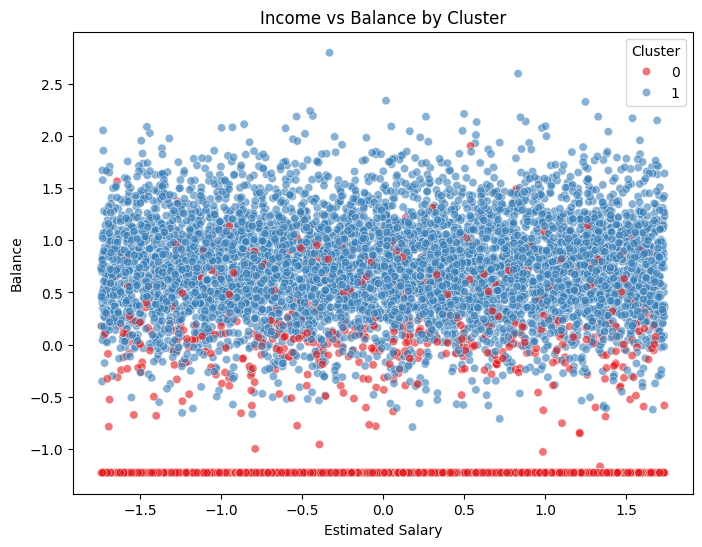

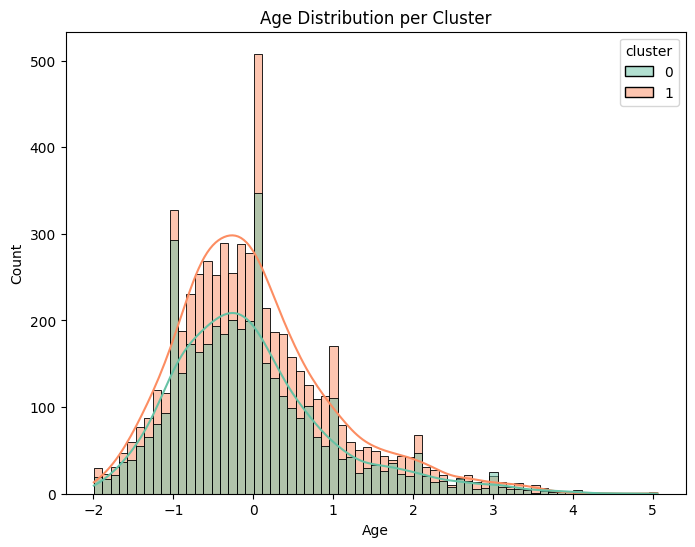

Cluster Statistics:
           customer_id  credit_score    gender       age    tenure   balance  \
cluster                                                                       
0        1.569214e+07     -0.012144  0.533822 -0.025935  0.022088 -1.064113   
1        1.569011e+07      0.008422  0.553937  0.017985 -0.015318  0.737941   

         products_number  credit_card  active_member  estimated_salary  \
cluster                                                                  
0               0.569677     0.014453      -0.004072         -0.015283   
1              -0.395060    -0.010023       0.002824          0.010598   

            churn  country_Germany  country_Spain  
cluster                                            
0        0.174603         0.044689       0.319170  
1        0.223878         0.393903       0.198137  


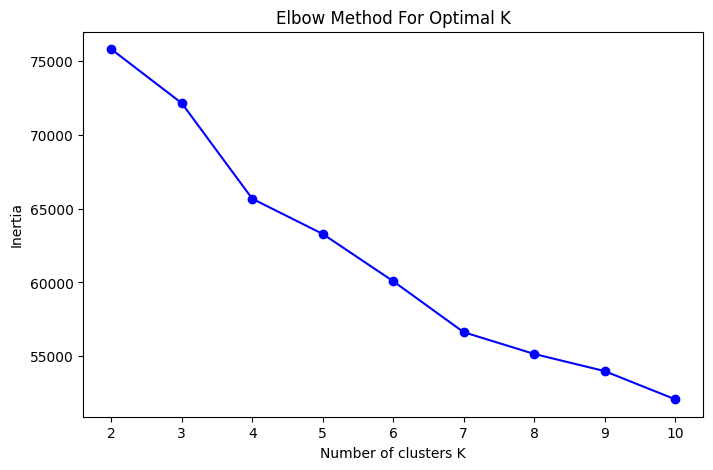

In [48]:
# 1. Income vs Balance scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='estimated_salary',
    y='balance',
    hue='cluster',
    data= df,
    palette='Set1',
    alpha=0.6
)
plt.title('Income vs Balance by Cluster')
plt.xlabel('Estimated Salary')
plt.ylabel('Balance')
plt.legend(title='Cluster')
plt.show()

# 2. Age distribution per cluster
plt.figure(figsize=(8,6))
sns.histplot(data=df, x='age', hue='cluster', bins= 'auto', kde=True, palette='Set2')
plt.title('Age Distribution per Cluster')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# 3. Cluster statistics jadvali
cluster_stats = df.groupby('cluster').mean()
print("Cluster Statistics:\n", cluster_stats)

# 4. Elbow plot (K=2 dan 10 gacha)
from sklearn.cluster import KMeans

X = df.drop(columns=['customer_id', 'churn', 'cluster'])
inertia = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of clusters K')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal K')
plt.show()

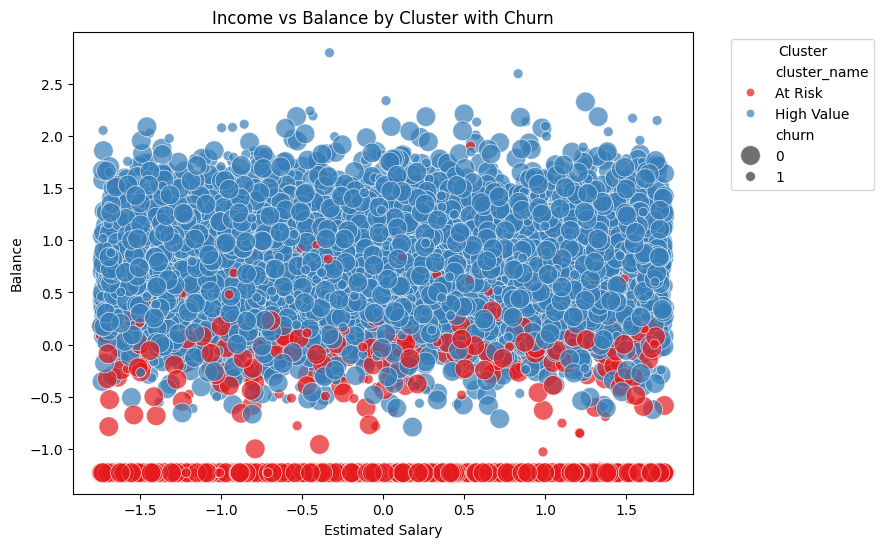

Cluster Statistics:
                balance  products_number     churn  estimated_salary
cluster_name                                                       
At Risk      -1.064113         0.569677  0.174603         -0.015283
High Value    0.737941        -0.395060  0.223878          0.010598


In [50]:
#  Klasterlarga nom berish
cluster_names = {0: "At Risk", 1: "High Value"}
df['cluster_name'] = df['cluster'].map(cluster_names)

# Income vs Balance scatter plot (klaster nomlari va churn)
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='estimated_salary',
    y='balance',
    hue='cluster_name',
    size='churn',         # churn 0/1 ga qarab marker hajmi
    sizes=(50,200),
    data = df,
    palette='Set1',
    alpha=0.7
)
plt.title('Income vs Balance by Cluster with Churn')
plt.xlabel('Estimated Salary')
plt.ylabel('Balance')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#  Cluster statistics jadvali
cluster_stats_named = df.groupby('cluster_name').mean()
print("Cluster Statistics:\n", cluster_stats_named[['balance','products_number','churn','estimated_salary']])